In [ ]:
!pip install pandas numpy matplotlib seaborn statsmodels scikit-learn causalml linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.6 MB/s eta 0:00:00


In [2]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Load Dataset
df = pd.read_csv("COVID_Deaths_Aggregated_Cleaned.csv")

# Define predictors and target
X_raw = df[['State', 'Sex', 'Age Group']]
y = df['COVID-19 Deaths']

# One-hot encode all predictors
encoder = OneHotEncoder(drop='first')
X_encoded_sparse = encoder.fit_transform(X_raw)
X = pd.DataFrame(X_encoded_sparse.toarray(), columns=encoder.get_feature_names_out(['State', 'Sex', 'Age Group']))
X = pd.get_dummies(df[['Sex', 'Age Group', 'State']], drop_first=True)

# Helps to see the new column names
print(X.columns.tolist())

# Display basic info
df.info()
df.describe()

# Check for missing values
print(df.isnull().sum())

['Sex_Male', 'Age Group_15-24 years', 'Age Group_18-29 years', 'Age Group_25-34 years', 'Age Group_30-39 years', 'Age Group_35-44 years', 'Age Group_40-49 years', 'Age Group_45-54 years', 'Age Group_50-64 years', 'Age Group_55-64 years', 'Age Group_65-74 years', 'Age Group_75-84 years', 'Age Group_85 years and over', 'State_Alaska', 'State_Arizona', 'State_Arkansas', 'State_California', 'State_Colorado', 'State_Connecticut', 'State_Delaware', 'State_District of Columbia', 'State_Florida', 'State_Georgia', 'State_Hawaii', 'State_Idaho', 'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas', 'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Maryland', 'State_Massachusetts', 'State_Michigan', 'State_Minnesota', 'State_Mississippi', 'State_Missouri', 'State_Montana', 'State_Nebraska', 'State_Nevada', 'State_New Hampshire', 'State_New Jersey', 'State_New Mexico', 'State_New York', 'State_New York City', 'State_North Carolina', 'State_North Dakota', 'State_Ohio', 'State_Ok

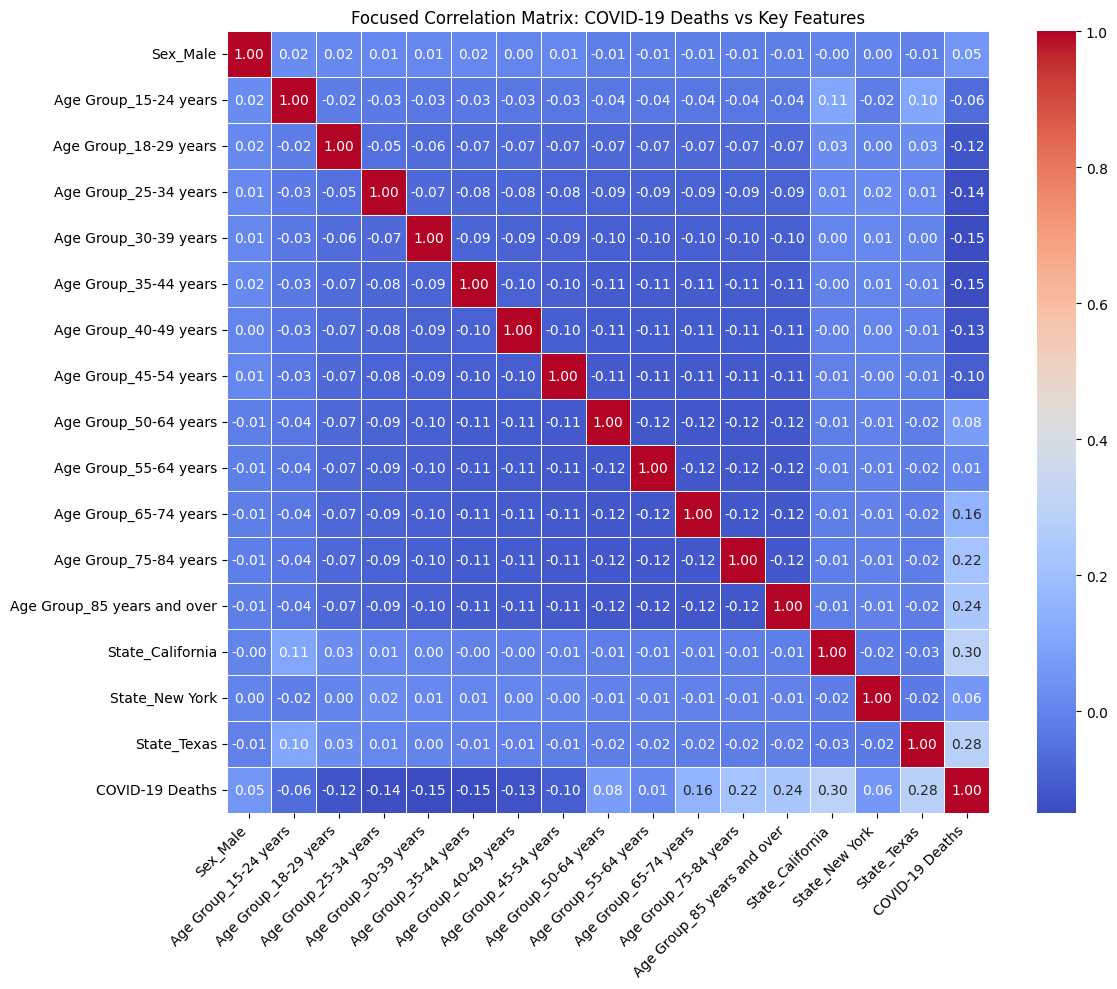

In [3]:
# Add target column back to X
X_corr = X.copy()
X_corr['COVID-19 Deaths'] = y

# Filter columns by selecting the most meaningful features  (age, sex, key states)
important_cols = [col for col in X_corr.columns if (
    "Age Group" in col or
    "Sex" in col or
    col in ['State_Texas', 'State_New York', 'State_California', 'COVID-19 Deaths']
)]

# Correlation matrix
focused_corr = X_corr[important_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(focused_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Focused Correlation Matrix: COVID-19 Deaths vs Key Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Simple Linear Regression: Predicting outcome with one predictor

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import pandas as pd

In [5]:
# Single predictor column
X_single = X[['Age Group_85 years and over']]

# Convert X and y to numeric explicitly
X_single = X_single.astype(float)
y = df['COVID-19 Deaths'].astype(float)

# Add constant for intercept
X_const = sm.add_constant(X_single)

# Fit the model
model = sm.OLS(y, X_const).fit()

# Print summary
print("\nSimple Linear Regression Results (Statsmodels):")
print(model.summary())



Simple Linear Regression Results (Statsmodels):
                            OLS Regression Results                            
Dep. Variable:        COVID-19 Deaths   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     57.35
Date:                Thu, 15 May 2025   Prob (F-statistic):           8.42e-14
Time:                        02:53:16   Log-Likelihood:                -8950.6
No. Observations:                 982   AIC:                         1.791e+04
Df Residuals:                     980   BIC:                         1.792e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

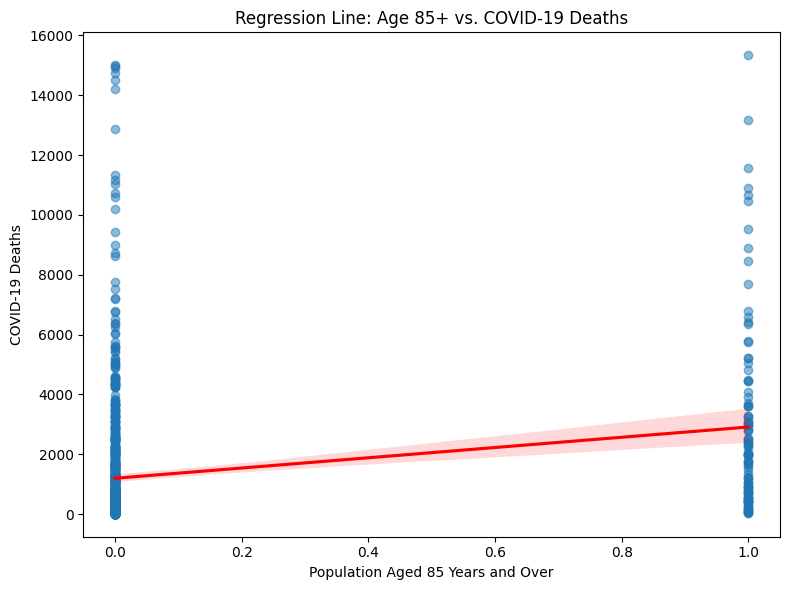

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualising the regression results
plt.figure(figsize=(8, 6))
sns.regplot(x=X['Age Group_85 years and over'], y=y,scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel("Population Aged 85 Years and Over")
plt.ylabel("COVID-19 Deaths")
plt.title("Regression Line: Age 85+ vs. COVID-19 Deaths")
plt.tight_layout()
plt.show()


# Multiple regression: Predicting with many predictors

In [7]:
import statsmodels.api as sm

# Recreate X to include all encoded columns (important if X was overwritten)
X = pd.get_dummies(df[['Sex', 'Age Group', 'State']], drop_first=True)

# Confirm the exact column names exist
print(X.columns.tolist())

# Define the predictors (make sure these match actual column names)
X_multi = X[['Sex_Male', 'Age Group_85 years and over', 'State_California', 'State_New York City']].astype(float)

# Define outcome
y = df['COVID-19 Deaths'].astype(float)

# Add intercept
X_multi = sm.add_constant(X_multi)

# Fit the model
model = sm.OLS(y, X_multi).fit()

# View results
print("\nMultiple Linear Regression Results:")
print(model.summary())


['Sex_Male', 'Age Group_15-24 years', 'Age Group_18-29 years', 'Age Group_25-34 years', 'Age Group_30-39 years', 'Age Group_35-44 years', 'Age Group_40-49 years', 'Age Group_45-54 years', 'Age Group_50-64 years', 'Age Group_55-64 years', 'Age Group_65-74 years', 'Age Group_75-84 years', 'Age Group_85 years and over', 'State_Alaska', 'State_Arizona', 'State_Arkansas', 'State_California', 'State_Colorado', 'State_Connecticut', 'State_Delaware', 'State_District of Columbia', 'State_Florida', 'State_Georgia', 'State_Hawaii', 'State_Idaho', 'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas', 'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Maryland', 'State_Massachusetts', 'State_Michigan', 'State_Minnesota', 'State_Mississippi', 'State_Missouri', 'State_Montana', 'State_Nebraska', 'State_Nevada', 'State_New Hampshire', 'State_New Jersey', 'State_New Mexico', 'State_New York', 'State_New York City', 'State_North Carolina', 'State_North Dakota', 'State_Ohio', 'State_Ok

# Evaluation Metrics

Simple regression

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

X = pd.get_dummies(df[['Sex', 'Age Group', 'State']], drop_first=True)

# Use one predictor
X = X[['Age Group_85 years and over']]

# Log-transform the target for better evaluation results by avoiding issues with zeros.
y_log = np.log1p(df['COVID-19 Deaths'])

# Train-test split 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(f"Metrics for Simple regression model\n")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")



Metrics for Simple regression model

Mean Squared Error: 2.7
R² Score: 0.13


Multiple regression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

X = pd.get_dummies(df[['Sex', 'Age Group', 'State']], drop_first=True)

# Define multiple predictors and target
X = X[[col for col in X.columns if col.startswith('Sex_')
                                or col.startswith('Age Group_')
                                or col.startswith('State_')]]

y = df['COVID-19 Deaths'].astype(float)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
print(f"Metrics for Multiple regression model\n")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")


Metrics for Multiple regression model

Mean Squared Error: 1515915.64
R² Score: 0.70
